# 1. 라이브러리 및 데이터

## Libary & Data

In [2]:
import pandas as pd # 판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor # 랜덤 포레스트 불러오기

In [4]:
# 데이터 불러오기
train = pd.read_csv('train.csv') # 모델 학습 파일
test = pd.read_csv('test.csv') # 모델 시험지 파일
submission = pd.read_csv('submission.csv') # 답안지 파일

# 2. 탐색적 자료분석
# Exploratory Data Analysis (EDA)

### pd.DataFrame.head()
* 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
* n의 기본 값(default 값)은 5

In [5]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


* id : 날짜와 시간별 id
* hour_bef_temperature : 1시간 전 기온
* hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
* hour_bef_windspeed : 1시간 전 풍속(평균)
* hour_bef_humidity : 1시간 전 습도
* hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
* hour_bef_ozone : 1시간 전 오존
* hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
* hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
* count : 시간에 따른 따릉이 대여 수


In [6]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [8]:
submission.head()

,id,count
0,0,NaN
1,1,NaN
2,2,NaN
3,4,NaN
4,5,NaN


### pd.DataFrame.tail()
* 데이터 프레임의 아래부터 n개 행을 보여주는 함수
* n의 기본 값(default 값)은 5

In [9]:
train.tail()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
1454,2174,4,16.8,0.0,1.6,53.0,2000.0,0.031,37.0,27.0,21.0
1455,2175,3,10.8,0.0,3.8,45.0,2000.0,0.039,34.0,19.0,20.0
1456,2176,5,18.3,0.0,1.9,54.0,2000.0,0.009,30.0,21.0,22.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0
1458,2179,17,21.1,0.0,3.1,47.0,1973.0,0.046,38.0,17.0,170.0


### pd.DataFrame.shape
* 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [10]:
train.shape

(1459, 11)

In [11]:
test.shape

(715, 10)

In [12]:
submission.shape

(715, 2)

### pd.DataFrame.info()
* 데이터셋의 column별 정보를 알려주는 함수
* 비어 있지 않은 값은(non-null)은 몇개인지?
* column의 type은 무엇인지?
* type의 종류 : int(정수), float(실수), object(문자열), 등등(date, ...)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


### pd.DataFrame.describe()
* 기술통계량을 보여주는 함수

In [14]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### pd.DataFrame.groupby()
* 집단에 대한 통계량 확인

In [15]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [5]:
import matplotlib.pyplot as plt

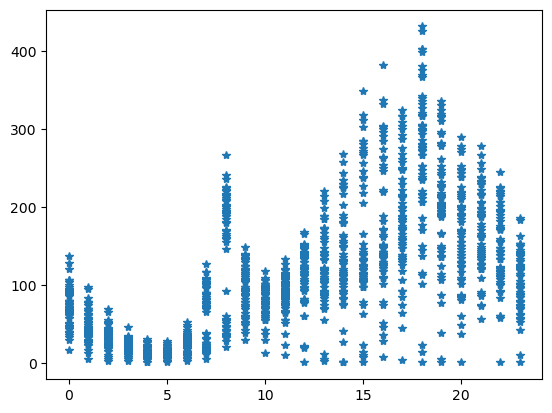

In [17]:
plt.plot('hour','count','*',data = train)

In [18]:
train.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

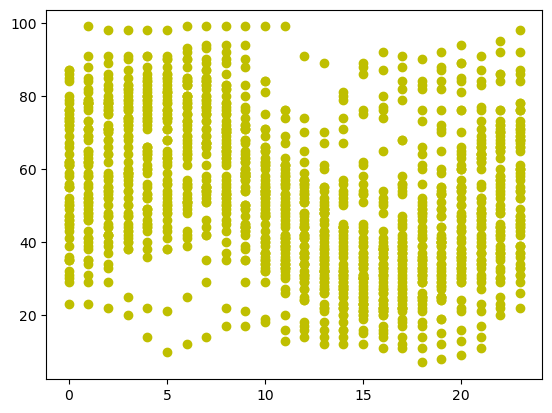

In [19]:
plt.plot('hour','hour_bef_humidity','yo', data=train)

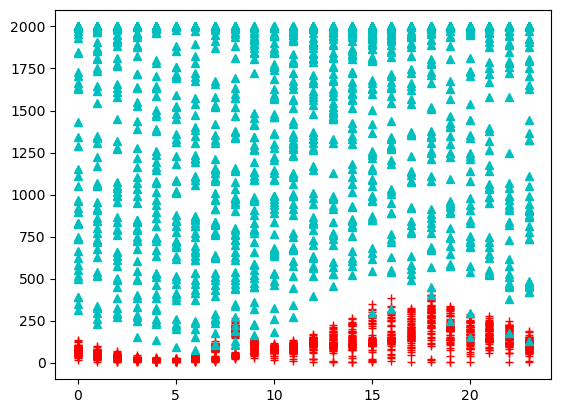

In [20]:
plt.plot('hour','count','r+', data=train)
plt.plot('hour','hour_bef_visibility','c^', data=train)

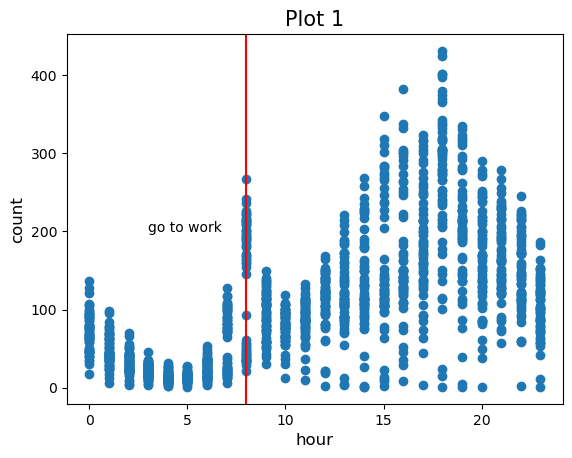

In [21]:
plt.title('Plot 1', fontsize = 15)
plt.plot('hour', 'count', 'o', data = train)
plt.xlabel('hour', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.axvline(8, color = 'red')
plt.text(3, 200, 'go to work', fontsize = 10)
plt.savefig('plot1.png')

### 상관계수
* 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치
* -1에서 1사이의 값을 지닙니다.
* -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다.
* 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다.

### pd.DataFrame.corr()

In [22]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [6]:
import seaborn as sns

<AxesSubplot:>

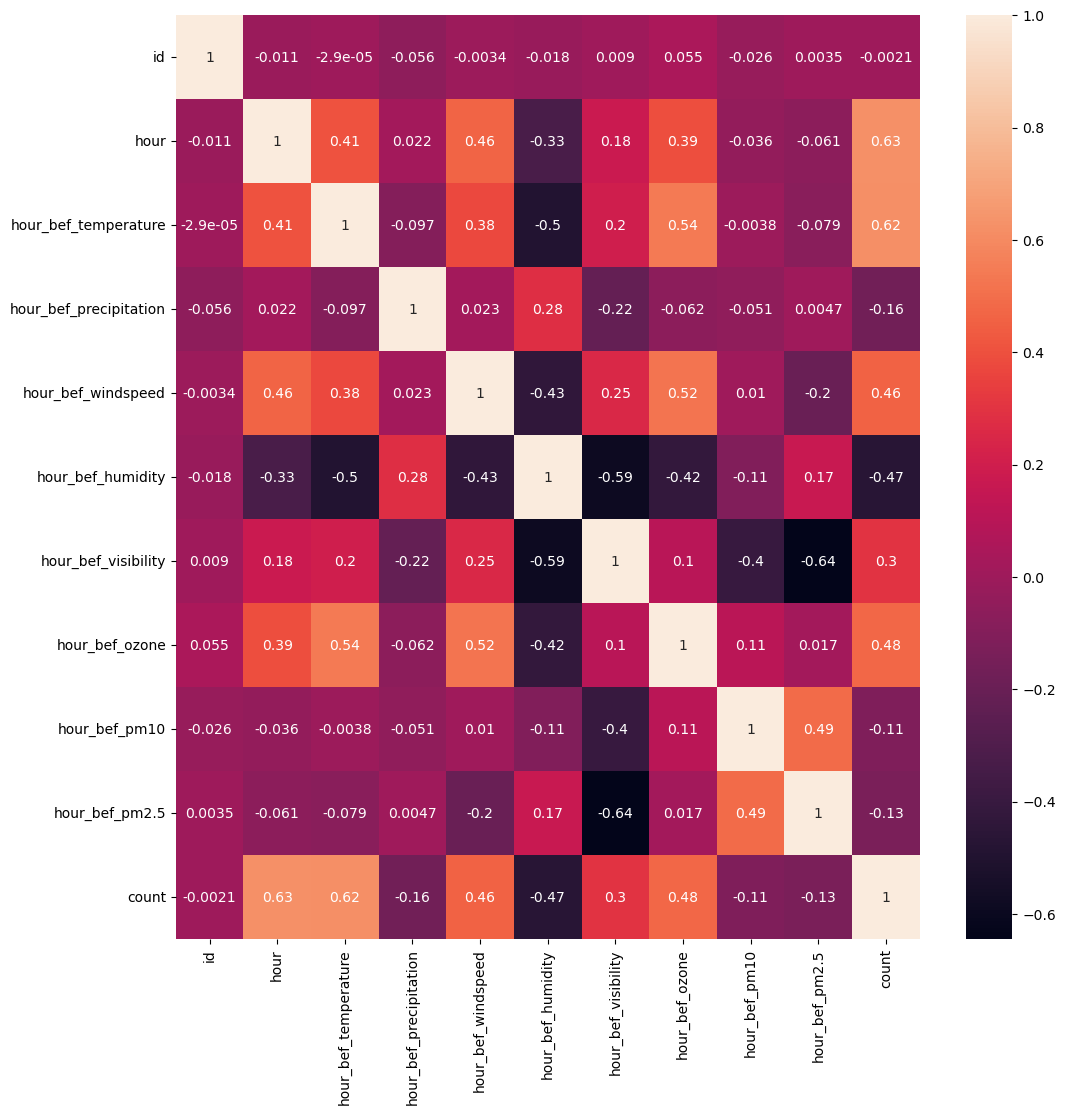

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(), annot = True)

In [25]:
import seaborn as sns

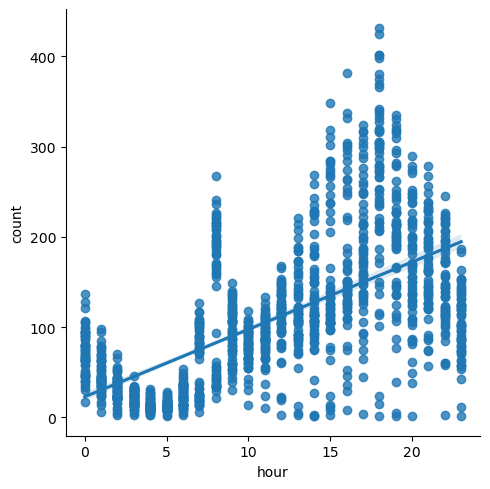

In [26]:
sns.lmplot(x = 'hour', y = 'count', data = train)

<AxesSubplot:ylabel='Frequency'>

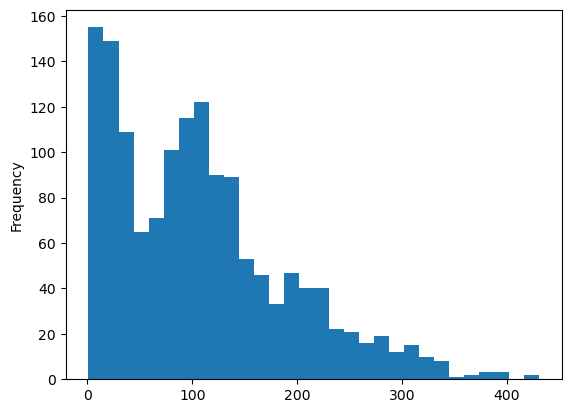

In [27]:
train['count'].plot(kind = 'hist', bins = 30)

히스토그램의 모양은 변수 분포에 대한 통찰력을 제공한다.  
대략 대칭적이고 종 모양의 히스토그램은 정규분포를 나타낸다.  
한쪽으로 치우져친 히스토그램은 비정규 분포를 나타낸다.

<AxesSubplot:xlabel='count', ylabel='Density'>

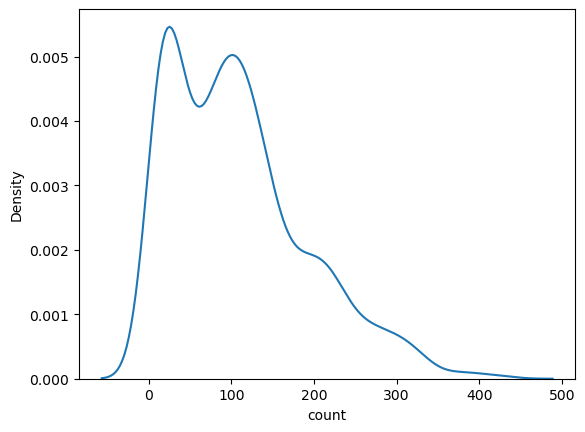

In [28]:
sns.kdeplot(train['count'])

### sns.boxplot()

<AxesSubplot:xlabel='hour', ylabel='hour_bef_humidity'>

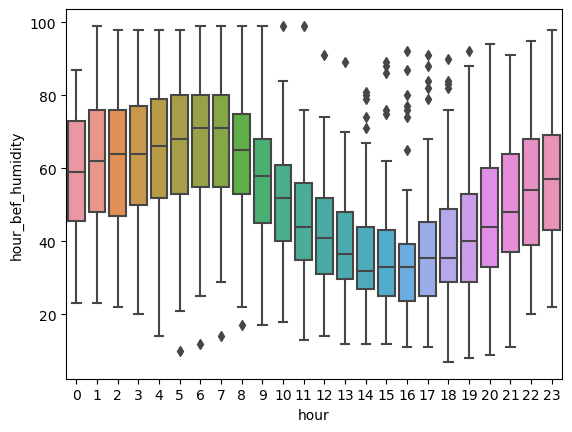

In [29]:
sns.boxplot(x = 'hour', y = 'hour_bef_humidity', data = train)

### sns.pairplot()

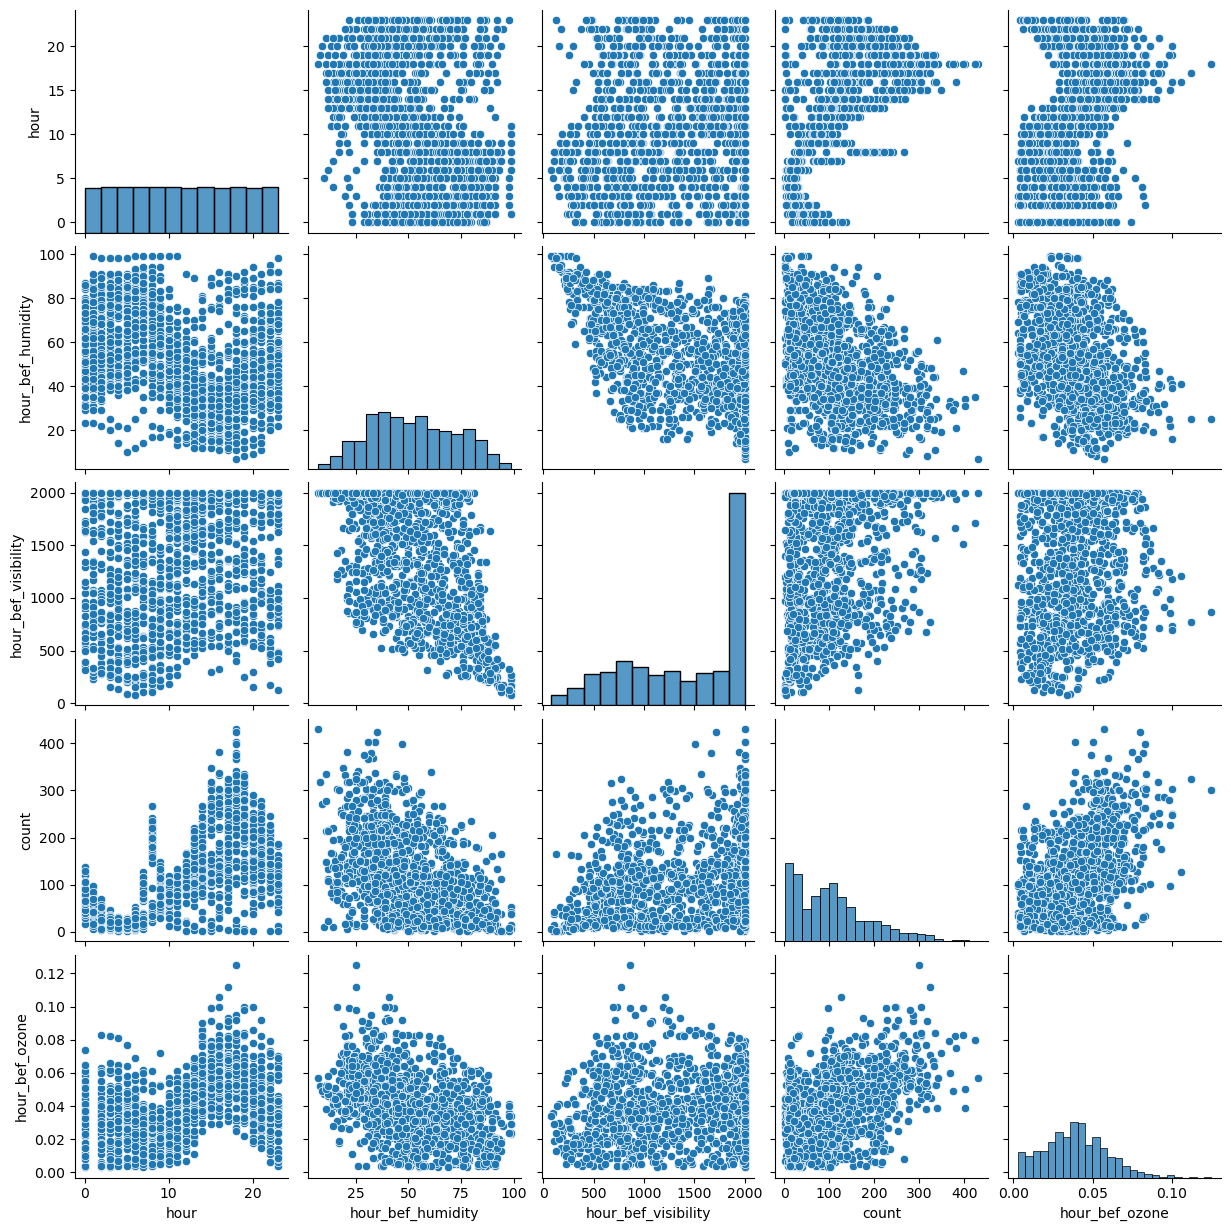

In [31]:
sns.pairplot(train[['hour', 'hour_bef_humidity', 'hour_bef_visibility', 'count', 'hour_bef_ozone']])

### sns.joinplot()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


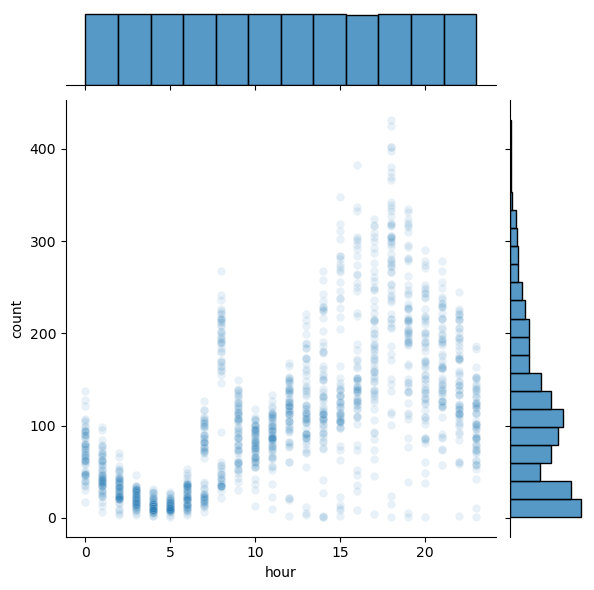

In [32]:
sns.jointplot('hour', 'count', data = train, alpha = 0.1)

'sns.jointplot()'은 Seaborn 데이터 시각화 라이브러리에서 Python으로 제공하는 함수로 두 변수 간의 결합 분포를 시각화하는 데 사용됩니다.


sns.jointplot()을 사용하여 다음을 수행할 수 있습니다.


1. 두 변수 간의 관계 조사: 두 변수가 있고 어떻게 관련되어 있는지 탐색하려는 경우 조인트 플롯을 사용하면 두 변수의 분포와 관계를 하나의 플롯으로 시각화할 수 있습니다.
2. 주변 분포가 있는 산점도 그리기: sns.jointplot()을 사용하면 두 변수 사이에 산점도를 만들고 각 변수에 대한 주변 분포를 추가할 수 있습니다. 이를 통해 각 변수의 분포를 보다 자세히 이해할 수 있습니다.
3. 데이터 밀도 시각화: sns.jointplot()은 또한 데이터의 커널 밀도 추정(KDE)을 그릴 수 있어 데이터 밀도와 존재할 수 있는 패턴을 확인하는 데 도움이 될 수 있습니다.

요약하면 sns.jointplot()은 두 변수 사이의 결합 분포를 시각화하는 데 유용한 도구입니다. 특히 하나의 플롯에서 각 변수의 산점도와 주변 분포를 모두 보고 싶을 때 유용합니다.

### sns.replot()

In [33]:
train[train['hour']>12]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
...,...,...,...,...,...,...,...,...,...,...,...
1448,2168,19,10.6,0.0,0.8,84.0,1091.0,0.033,23.0,22.0,114.0
1450,2170,15,23.1,0.0,4.3,23.0,1798.0,0.064,54.0,29.0,266.0
1453,2173,18,24.8,0.0,3.6,33.0,1262.0,0.084,113.0,49.0,303.0
1457,2178,21,20.7,0.0,3.7,37.0,1395.0,0.082,71.0,36.0,216.0


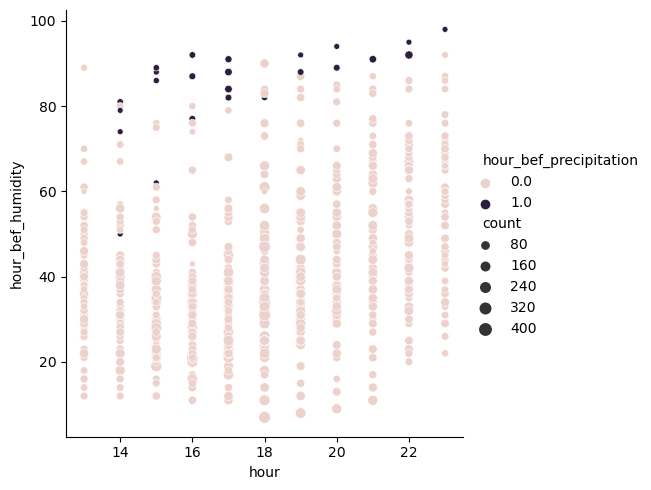

In [35]:
sns.relplot(x = 'hour', y = 'hour_bef_humidity', hue = 'hour_bef_precipitation', size = 'count', data = train[train['hour']>12])

전반적으로 이 코드는 오후와 저녁 시간 동안의 데이터에 대해서만 강수량에 따라 색상이 지정되고 개수에 따라 크기가 지정된 포인트와 함께 습도와 하루 중 시간 사이의 관계를 보여주는 산점도를 생성합니다.

# 3. 데이터 전처리

# Data Cleaning & Pre-Processing

### pd.Series.isna()
* 결측치 여부를 확인해준다
* 결측치면 True, 아니면 False

In [7]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

### pd.DataFrame.fillna()
* 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 한다.

In [8]:
train['hour_bef_temperature'] = train['hour_bef_temperature'].fillna(value = train['hour_bef_temperature'].mean())

In [9]:
train_isna_sum = train.isna().sum()

In [10]:
train_isna_sum[train_isna_sum != 0].index

Index(['hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity',
       'hour_bef_visibility', 'hour_bef_ozone', 'hour_bef_pm10',
       'hour_bef_pm2.5'],
      dtype='object')

In [11]:
na_columns = train_isna_sum[train_isna_sum != 0].index

In [12]:
def fill_bicycle_na(df, column):
    df[column] = df[column].fillna(value=df[column].mean())

In [13]:
fill_bicycle_na(train,'hour_bef_precipitation')

In [14]:
for col in na_columns:
    fill_bicycle_na(train,col)
    print(col,"결측치 대체 완료")

hour_bef_precipitation 결측치 대체 완료
hour_bef_windspeed 결측치 대체 완료
hour_bef_humidity 결측치 대체 완료
hour_bef_visibility 결측치 대체 완료
hour_bef_ozone 결측치 대체 완료
hour_bef_pm10 결측치 대체 완료
hour_bef_pm2.5 결측치 대체 완료


In [17]:
test_isna_sum = test.isna().sum()

In [19]:
test_na_columns = test_isna_sum[test_isna_sum != 0].index

In [20]:
for col in test_na_columns:
    print(col)

hour_bef_temperature
hour_bef_precipitation
hour_bef_windspeed
hour_bef_humidity
hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [21]:
for col in test_na_columns:
    fill_bicycle_na(test,col)
    print(col, "대체 완료")

hour_bef_temperature 대체 완료
hour_bef_precipitation 대체 완료
hour_bef_windspeed 대체 완료
hour_bef_humidity 대체 완료
hour_bef_visibility 대체 완료
hour_bef_ozone 대체 완료
hour_bef_pm10 대체 완료
hour_bef_pm2.5 대체 완료


In [22]:
test.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
dtype: int64

In [23]:
train.isna().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

# 4. 변수 선택 및 모델 구축

# Feature Engineering & Initial Modeling